<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/scripts/tema04/02-iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.14

# Predicción de la longitud del sépalo en función de la anchura del pétalo 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [0]:
session = tf.Session()
iris = datasets.load_iris()

In [0]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

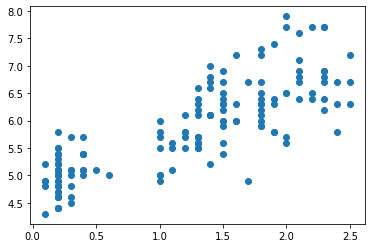

In [22]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")

In [0]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

$$y = Ax+b$$

In [0]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [0]:
# funcion de perdida
loss_l2 = tf.reduce_mean(tf.square(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l2)
init = tf.global_variables_initializer()
session.run(init)

In [26]:
loss_vect_l2 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l2, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l2.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[2.5492525]], b=[[2.3117428]], Loss = 1.7466697
Paso #20, A=[[2.2585633]], b=[[2.774118]], Loss = 1.6553013
Paso #30, A=[[2.021819]], b=[[3.167924]], Loss = 1.1014488
Paso #40, A=[[1.7093121]], b=[[3.3710158]], Loss = 0.9282711
Paso #50, A=[[1.6751372]], b=[[3.6855166]], Loss = 0.3318911
Paso #60, A=[[1.4744498]], b=[[3.8577387]], Loss = 0.3032866
Paso #70, A=[[1.4027159]], b=[[4.043538]], Loss = 0.41470805
Paso #80, A=[[1.3269751]], b=[[4.2035213]], Loss = 0.33504584
Paso #90, A=[[1.2158394]], b=[[4.3220987]], Loss = 0.24465269
Paso #100, A=[[1.1093477]], b=[[4.384291]], Loss = 0.20622438


In [0]:
[[slope]] = session.run(A)# valor de la pendiente
[[intercept]] = session.run(b)# la oredenada en el origen


In [29]:
print(str(slope)+"x + "+str(intercept))

1.1093477x + 4.384291


In [0]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

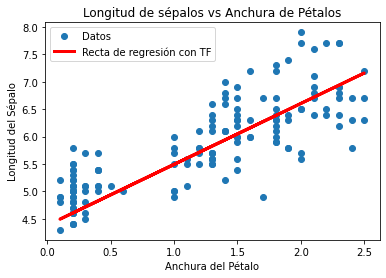

In [31]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

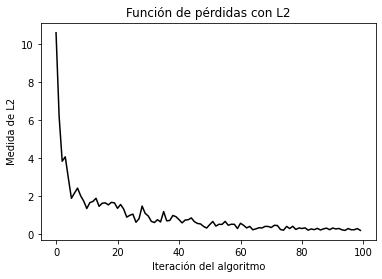

In [79]:
plt.plot(loss_vect_l2, "k-")
plt.title("Función de pérdidas con L2")
plt.xlabel("Iteración del algoritmo")
plt.ylabel("Medida de L2")
plt.show()

In [0]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [0]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [0]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [0]:
loss_l1 = tf.reduce_mean(tf.abs(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l1)
init = tf.global_variables_initializer()
session.run(init)

In [85]:
loss_vect_l1 = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l1, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l1.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[-0.13413922]], b=[[0.84548926]], Loss = 5.0533314
Paso #20, A=[[0.4576608]], b=[[1.345489]], Loss = 4.1171727
Paso #30, A=[[1.0636606]], b=[[1.8454885]], Loss = 2.683647
Paso #40, A=[[1.6828607]], b=[[2.3414881]], Loss = 1.5013986
Paso #50, A=[[1.9452605]], b=[[2.6894882]], Loss = 0.9081906
Paso #60, A=[[1.9854608]], b=[[2.909488]], Loss = 0.8138048
Paso #70, A=[[1.9628608]], b=[[3.0694876]], Loss = 0.68084055
Paso #80, A=[[1.9342608]], b=[[3.2254875]], Loss = 0.9339397
Paso #90, A=[[1.8690608]], b=[[3.3494873]], Loss = 0.7781685
Paso #100, A=[[1.7428609]], b=[[3.4574873]], Loss = 0.74573
Paso #110, A=[[1.638261]], b=[[3.5614874]], Loss = 0.6960296
Paso #120, A=[[1.5114608]], b=[[3.6654868]], Loss = 0.6562491
Paso #130, A=[[1.4858608]], b=[[3.8174865]], Loss = 0.55766535
Paso #140, A=[[1.4074608]], b=[[3.9374862]], Loss = 0.47538868
Paso #150, A=[[1.3416607]], b=[[4.0734863]], Loss = 0.50708884
Paso #160, A=[[1.2376609]], b=[[4.1774874]], Loss = 0.40209693
Paso #170, A=[[

In [0]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

In [87]:
print(str(slope)+"x + "+str(intercept))

0.8466599x + 4.789486


In [0]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

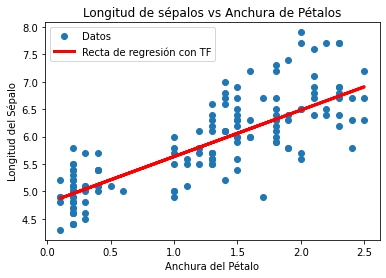

In [89]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

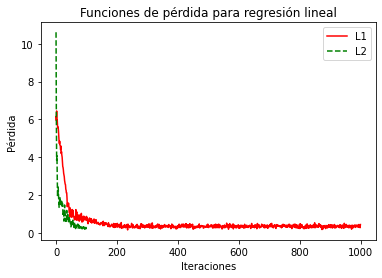

In [93]:
plt.plot(loss_vect_l1, 'r-', label = "L1")
plt.plot(loss_vect_l2, 'g--', label = "L2")
plt.title("Funciones de pérdida para regresión lineal")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.legend(loc = "upper right")
plt.show()

In [0]:
slope*np.mean(x_vals)+intercept

5.759749668916067

In [0]:
intercept

4.3478765

1.1986666666666668

In [0]:
np.mean(y_vals)

5.843333333333334